# Data Description: Visualize and Summarize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Box Scores Visualization

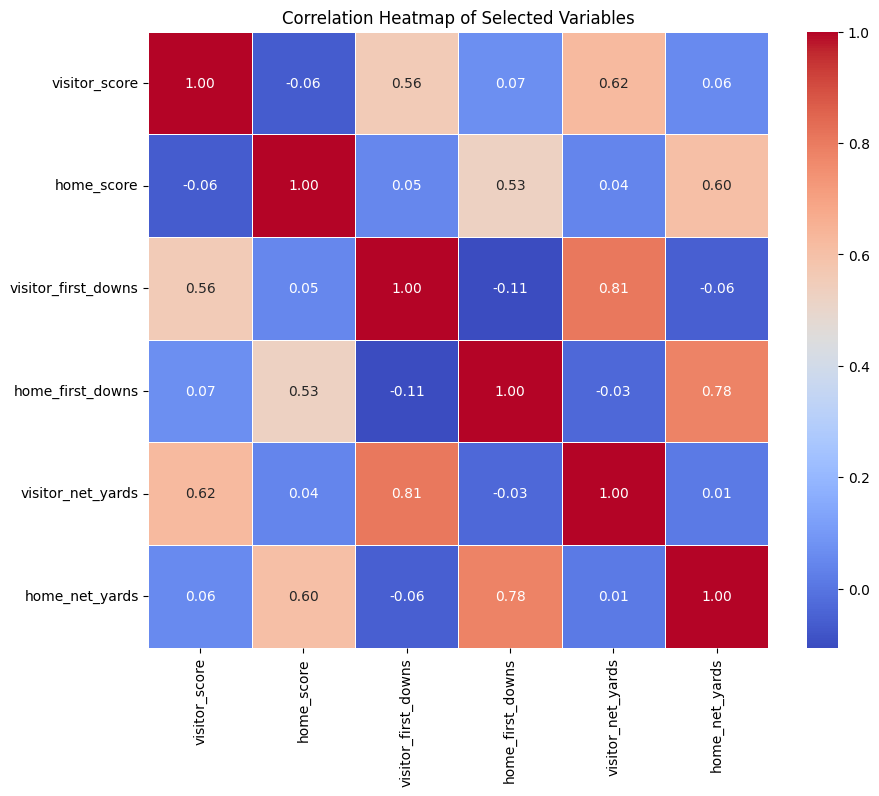

In [3]:
df_box = pd.read_csv("cleaned-data/box_scores_2010_2017.csv")

df_box['date'] = pd.to_datetime(df_box['date'])

numeric_columns = ['visitor_score', 'home_score', 'visitor_first_downs', 'home_first_downs', 'visitor_net_yards', 'home_net_yards']

correlation_matrix = df_box[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

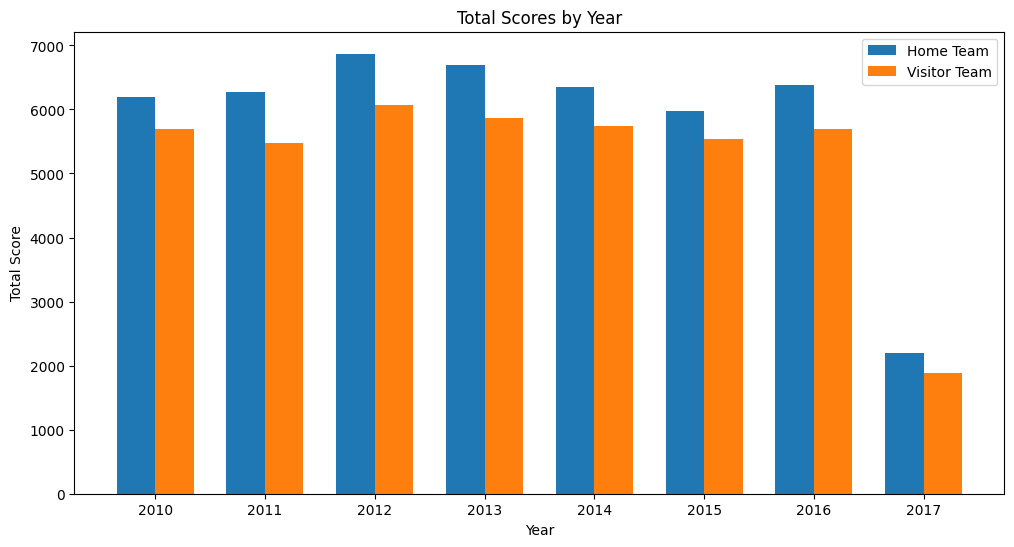

In [4]:
df_box['year'] = df_box['date'].dt.year

df_yearly_scores = df_box.groupby('year').agg({'home_score': 'sum', 'visitor_score': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
bar_width = 0.35
plt.bar(df_yearly_scores['year'], df_yearly_scores['home_score'], width=bar_width, label='Home Team')
plt.bar(df_yearly_scores['year'] + bar_width, df_yearly_scores['visitor_score'], width=bar_width, label='Visitor Team')

plt.xlabel('Year')
plt.ylabel('Total Score')
plt.title('Total Scores by Year')
plt.xticks(df_yearly_scores['year'] + bar_width / 2, df_yearly_scores['year'])
plt.legend()
plt.show()

In [5]:
sf_49ers_home = df_box[df_box['home'] == 'San Francisco']
sf_49ers_away = df_box[df_box['visitor'] == 'San Francisco']

sf_49ers_home_mean = sf_49ers_home.groupby('year')['home_net_yards'].mean().reset_index()
sf_49ers_away_mean = sf_49ers_away.groupby('year')['visitor_net_yards'].mean().reset_index()

fig = px.line(sf_49ers_home_mean, x='year', y='home_net_yards', 
              title='Mean Net Yards for San Francisco 49ers (Home vs Away) Over the Years',
              labels={'home_net_yards': 'Mean Net Yards'},
              line_shape='linear', render_mode='svg')

fig.add_scatter(x=sf_49ers_away_mean['year'], y=sf_49ers_away_mean['visitor_net_yards'],
                mode='lines', name='Away', line=dict(shape='linear', color='orange'))

fig.update_layout(xaxis_title='Year', yaxis_title='Mean Net Yards')

fig.show()

### Team Stats Visualization

In [6]:
nfl_team_stats = pd.read_csv('cleaned-data/nfl_team_stats_2010_2021.csv')
nfl_team_stats.drop(columns=['Unnamed: 0'], inplace=True)
nfl_team_stats.head()

,Team,WinLoss perc,PD,Year,FGM,FG_perc,RedZone_perc,RushYperG,PassYperG,PointperG,possperG,YallowedperG,PointallowedperG
0,New England Patriots,87.5,205,2010,22,88.0,62.7,123.3,240.4,32.4,0.490000,366.9,19.6
1,New York Jets,68.8,63,2010,30,76.9,40.0,148.4,203.2,22.9,0.543611,291.4,19.0
2,Miami Dolphins,43.8,-60,2010,30,73.2,52.9,102.7,220.4,17.1,0.514722,309.3,20.8
3,Buffalo Bills,25.0,-142,2010,16,76.2,51.4,107.5,197.8,17.7,0.476389,361.6,26.6
4,Pittsburgh Steelers,75.0,143,2010,29,78.4,48.0,120.2,225.0,23.4,0.540000,276.8,14.5


In [20]:
team_name = 'San Francisco 49ers'
team_data = nfl_team_stats[nfl_team_stats['Team'] == team_name]

fig = px.line(team_data, x='Year', y='WinLoss perc', markers=True,
                labels={'value': 'Win/Loss Percentage'},
                title=f'{team_name} Performance Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Win/Loss Percentage')
fig.update_traces(line=dict(color='red'))
fig.show()

In [8]:
fig = px.line(team_data, x='Year', y='PointperG', markers=True,
              labels={'PointperG': 'Points per Game'},
              title=f'{team_name} Points per Game Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Points per Game')
fig.show()

In [21]:
team_name = 'New England Patriots'
team_data = nfl_team_stats[nfl_team_stats['Team'] == team_name]

fig = px.line(team_data, x='Year', y='WinLoss perc', markers=True,
                labels={'value': 'Win/Loss Percentage'},
                title=f'{team_name} Performance Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Win/Loss Percentage')
fig.update_traces(line=dict(color='red'))
fig.show()

In [22]:
fig = px.line(team_data, x='Year', y='PointperG', markers=True,
              labels={'PointperG': 'Points per Game'},
              title=f'{team_name} Points per Game Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Points per Game')
fig.show()

In [23]:
team_name = 'Kansas City Chiefs'
team_data = nfl_team_stats[nfl_team_stats['Team'] == team_name]

fig = px.line(team_data, x='Year', y='WinLoss perc', markers=True,
                labels={'value': 'Win/Loss Percentage'},
                title=f'{team_name} Performance Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Win/Loss Percentage')
fig.update_traces(line=dict(color='red'))
fig.show()

In [24]:
fig = px.line(team_data, x='Year', y='PointperG', markers=True,
              labels={'PointperG': 'Points per Game'},
              title=f'{team_name} Points per Game Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Points per Game')
fig.show()

In [11]:
fig = px.histogram(nfl_team_stats, x='PointallowedperG', nbins=20, title='Distribution of Points Allowed per Game')
fig.update_xaxes(range=[0, 40])
fig.update_layout(xaxis_title='Points Allowed per Game', yaxis_title='Frequency')
fig.show()

In [12]:
fig = px.scatter(nfl_team_stats, x='WinLoss perc', y='PointperG', color='Team', size="Year",
                 title='Team Comparison - Win-Loss Percentage vs. Points Scored per Game')
fig.update_layout(xaxis_title='Win-Loss Percentage', yaxis_title='Points Scored per Game')
fig.show()

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

for team in nfl_team_stats['Team'].unique():
    team_data = nfl_team_stats[nfl_team_stats['Team'] == team]
    fig.add_trace(go.Scatter(x=team_data['PointperG'], y=team_data['PointallowedperG'],
                             mode='markers',
                             name=team))

fig.update_layout(title='Offensive vs. Defensive Performance',
                  xaxis_title='Points Scored per Game',
                  yaxis_title='Points Allowed per Game')
fig.show()

### NFL Game Data Visualizations

In [14]:
nfl_game_data = pd.read_csv('cleaned-data/nfl_game_data_2010_2023.csv')
nfl_game_data.drop(columns=['Unnamed: 0'], inplace=True)
nfl_game_data.head()

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,stadium,weather_temperature,weather_wind_mph
0,2010-09-09,2010,1,New Orleans Saints,14.0,9.0,Minnesota Vikings,NO,-5.0,Louisiana Superdome,72.0,0.0
1,2010-09-12,2010,1,Buffalo Bills,10.0,15.0,Miami Dolphins,MIA,-3.0,Ralph Wilson Stadium,64.0,7.0
2,2010-09-12,2010,1,Chicago Bears,19.0,14.0,Detroit Lions,CHI,-6.5,Soldier Field,75.0,1.0
3,2010-09-12,2010,1,Houston Texans,34.0,24.0,Indianapolis Colts,IND,-1.0,Reliant Stadium,89.0,5.0
4,2010-09-12,2010,1,Jacksonville Jaguars,24.0,17.0,Denver Broncos,JAX,-3.0,EverBank Field,91.0,1.0


In [15]:
fig = px.histogram(nfl_game_data, x='score_home', nbins=20, opacity=0.7, title='Distribution of Home Team Scores')
fig.update_layout(xaxis_title='Home Team Score', yaxis_title='Frequency')
fig.show()

In [16]:
team_name = 'Kansas City Chiefs'
team_home_data = nfl_game_data[nfl_game_data['team_home'] == team_name]
team_away_data = nfl_game_data[nfl_game_data['team_away'] == team_name]

team_home_scores = team_home_data.groupby('schedule_season').agg({'score_home': 'mean'}).reset_index()
team_away_scores = team_away_data.groupby('schedule_season').agg({'score_away': 'mean'}).reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=team_home_scores['schedule_season'], y=team_home_scores['score_home'], mode='lines', name='Home Game Scores'))
fig.add_trace(go.Scatter(x=team_away_scores['schedule_season'], y=team_away_scores['score_away'], mode='lines', name='Away Game Scores'))

fig.update_layout(title="Chiefs Scoring Over Seasons", xaxis_title='Season', yaxis_title='Score')

fig.show()

In [17]:
team_name = 'San Francisco 49ers'
team_home_data = nfl_game_data[nfl_game_data['team_home'] == team_name]
team_away_data = nfl_game_data[nfl_game_data['team_away'] == team_name]

team_home_scores = team_home_data.groupby('schedule_season').agg({'score_home': 'mean'}).reset_index()
team_away_scores = team_away_data.groupby('schedule_season').agg({'score_away': 'mean'}).reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=team_home_scores['schedule_season'], y=team_home_scores['score_home'], mode='lines', name='Home Game Scores'))
fig.add_trace(go.Scatter(x=team_away_scores['schedule_season'], y=team_away_scores['score_away'], mode='lines', name='Away Game Scores'))

fig.update_layout(title="49ers Scoring Over Seasons", xaxis_title='Season', yaxis_title='Score')

fig.show()